In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 14000)
pd.set_option("display.max_columns", 101)


In [5]:
df=pd.read_csv('bmw_pricing_challenge.csv')
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,01-02-2012,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,01-01-2018
1,BMW,M4,13929,317,01-04-2016,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,01-02-2018
2,BMW,320,183297,120,01-04-2012,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,01-02-2018
3,BMW,420,128035,135,01-07-2014,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,01-02-2018
4,BMW,425,97097,160,01-12-2014,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,01-04-2018


In [7]:
df.shape

(4843, 18)

In [8]:
df.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at'],
      dtype='object')

In [9]:
df.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


In [11]:
df.dtypes

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

In [15]:
df.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [26]:
# df.groupby('model_key')[['price']].max()
df[['model_key','price']].max()

model_key        i8
price        178500
dtype: object

In [31]:
# sorted(df.mileage)

In [29]:
df[df.mileage==-64]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,-64,230,01-03-2017,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,01-04-2018


In [30]:
df[df.model_key=='i8']

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
90,BMW,i8,12402,170,01-01-2016,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200,01-04-2018


In [50]:
x=df.groupby('fuel')[['mileage','price']].mean()

In [51]:
y=df.groupby('fuel')['model_key'].count()

In [55]:
pd.concat([y,x],axis=1,keys=['model_key','avg_mileage','avg_price'])

model_key   avg_mileage              
              model_key       mileage         price
fuel                                               
diesel             4641  141560.15794  15846.110752
electro               3   50547.00000  20966.666667
hybrid_petrol         8   89407.00000  37575.000000
petrol              191  130027.47644  14398.429319

In [60]:
df.groupby('model_key')[['price']].median().sort_values('price',ascending=False)

,price
model_key,
i8,95200
M4,61650
X5 M50,49900
X6 M,45800
M5,41600
...,...
650,8000
Z4,7100
523,6200


In [61]:
df.groupby('model_key')[['price']].median().sort_values('price',ascending=False)

,price
model_key,
i8,95200
M4,61650
X5 M50,49900
X6 M,45800
M5,41600
...,...
650,8000
Z4,7100
523,6200


In [67]:
pd.concat([df.groupby('model_key')['price'].count(),df.groupby('model_key')['price'].mean()],axis=1,keys=['count','avg_price']).sort_values('count',ascending=False)

,count,avg_price
model_key,,
320,752,12161.702128
520,633,15709.162717
318,569,10987.170475
X3,438,18175.799087
116,358,9653.910615
...,...,...
ActiveHybrid 5,1,21100.000000
735,1,4500.000000
635,1,19300.000000


In [68]:
df.registration_date=pd.to_datetime(df.registration_date,format='%d-%m-%Y')
df.sold_at=pd.to_datetime(df.sold_at,format='%d-%m-%Y')

In [70]:
from datetime import datetime
df['car_age_year']=datetime.today().year-df.registration_date.dt.year
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,car_age_year
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01,9
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01,5
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01,9
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01,7
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01,7


In [72]:
df['car_age_year'].describe()

count    4843.000000
mean        8.532521
std         2.526997
min         4.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        31.000000
Name: car_age_year, dtype: float64

In [98]:
x=df['car_age_year'].unique()
x=sorted(x)
price_lst=[]
for i in x:
    p=df[df['car_age_year']==i]['price'].mean()
    price_lst.append(p)

<function sorted(iterable, /, *, key=None, reverse=False)>

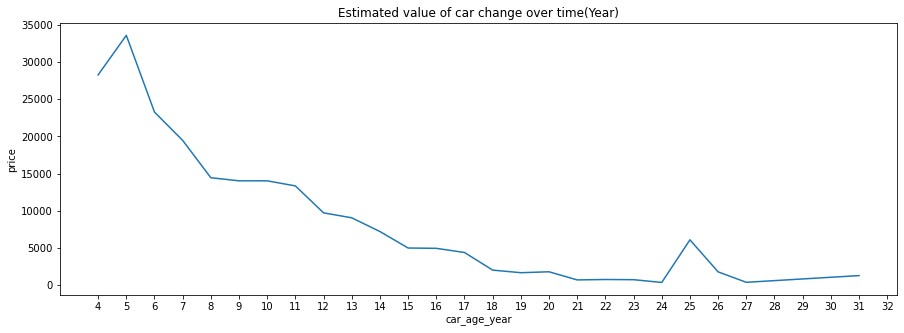

In [115]:
plt.figure(figsize = (15,5))
plt.plot(x,price_lst)
plt.xlabel('car_age_year')
plt.ylabel('price')
plt.title('Estimated value of car change over time(Year)')
plt.xticks(np.arange(min(x), max(x)+2,1 ))
plt.yticks(np.arange(0,40000,5000))
plt.show()

In [116]:
days = pd.to_datetime('2021-07-01', format = '%Y-%m-%d') -  df.registration_date 

df['CarAge(Days)']  = days.apply(lambda x : str(x).split(' ')[0]).astype(int)

df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,car_age_year,CarAge(Days)
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01,9,3438
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01,5,1917
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01,9,3378
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01,7,2557
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01,7,2404


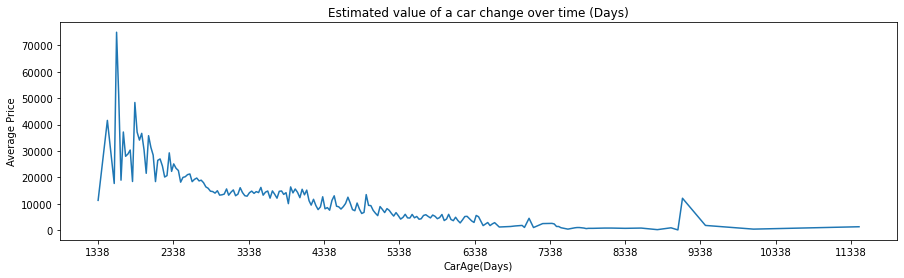

In [117]:
x = df['CarAge(Days)'].unique()
x = sorted(x)

price_lst = []
for each in x:
    p = df[df['CarAge(Days)'] == each]['price'].mean()
    price_lst.append(p)
    
plt.figure(figsize = (15,4))    
plt.plot(x, price_lst)
plt.xlabel('CarAge(Days)')
plt.ylabel('Average Price')
plt.xticks(np.arange(min(x), max(x)+1,1000 ))
plt.title('Estimated value of a car change over time (Days)')
plt.show()    

In [118]:
df[df.car_age_year==25]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,car_age_year,CarAge(Days)
41,BMW,M3,270907,236,1996-08-01,petrol,black,convertible,True,False,False,False,False,True,True,False,12100,2018-08-01,25,9100
2829,BMW,525,439060,105,1996-10-01,diesel,silver,sedan,False,False,True,False,False,False,True,False,100,2018-03-01,25,9039


In [119]:
df[df.model_key=='M3']

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,car_age_year,CarAge(Days)
41,BMW,M3,270907,236,1996-08-01,petrol,black,convertible,True,False,False,False,False,True,True,False,12100,2018-08-01,25,9100
67,BMW,M3,29925,309,2012-09-01,petrol,silver,coupe,True,True,False,False,True,True,True,True,47000,2018-04-01,9,3225
73,BMW,M3,170550,309,2011-03-01,petrol,grey,coupe,True,True,False,False,True,False,True,True,28000,2018-03-01,10,3775
93,BMW,M3,99283,309,2008-09-01,petrol,silver,coupe,False,False,False,False,True,False,True,True,28600,2018-04-01,13,4686
139,BMW,M3,169970,309,2011-03-01,petrol,grey,coupe,True,True,False,False,True,False,True,True,35700,2018-08-01,10,3775
2944,BMW,M3,33670,317,2014-03-01,petrol,blue,sedan,True,True,False,False,False,True,True,True,51200,2018-04-01,7,2679
3092,BMW,M3,39250,317,2015-11-01,petrol,black,sedan,True,True,False,False,False,True,True,True,52400,2018-05-01,6,2069


In [121]:
df[df.car_type=='convertible']['price'].describe()

count       47.000000
mean     17136.170213
std      12329.399744
min       1800.000000
25%       8650.000000
50%      12400.000000
75%      24250.000000
max      69700.000000
Name: price, dtype: float64

In [126]:
df[(df.car_type=='convertible') & (df.price ==1800)]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,car_age_year,CarAge(Days)
25,BMW,318,196092,85,1995-10-01,petrol,blue,convertible,True,False,False,False,False,False,False,False,1800,2018-05-01,26,9405


In [133]:
df[df.car_age_year==5].sort_values('price').head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,car_age_year,CarAge(Days)
3705,BMW,114,25703,70,2016-01-01,diesel,grey,subcompact,False,True,False,False,False,False,True,False,8200,2018-05-01,5,2008
3468,BMW,316,24339,85,2016-06-01,diesel,blue,sedan,False,True,False,False,False,False,True,False,10200,2018-07-01,5,1856
1791,BMW,116,10708,85,2016-08-01,diesel,grey,hatchback,False,True,False,False,False,False,True,False,11100,2018-07-01,5,1795
4524,BMW,X3,65918,120,2016-04-01,diesel,black,suv,True,True,True,True,False,True,True,True,15600,2018-07-01,5,1917
4830,BMW,216 Gran Tourer,48012,85,2016-02-01,diesel,blue,van,True,True,False,False,False,True,True,False,15600,2018-06-01,5,1977


In [134]:
df[df.model_key=='X5 M']

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,car_age_year,CarAge(Days)
3856,BMW,X5 M,219372,155,2012-01-01,diesel,black,suv,True,True,True,True,True,True,True,True,19800,2018-07-01,9,3469
3869,BMW,X5 M,163188,225,2013-03-01,diesel,silver,suv,True,True,True,True,True,False,True,True,29200,2018-02-01,8,3044
3893,BMW,X5 M,30663,190,2014-07-01,diesel,grey,suv,True,True,False,False,True,False,True,True,41200,2018-03-01,7,2557
4066,BMW,X5 M,98050,230,2014-10-01,diesel,black,suv,True,True,False,True,False,True,True,True,49700,2018-03-01,7,2465
4072,BMW,X5 M,29245,160,2015-03-01,diesel,grey,suv,True,True,True,False,True,False,True,True,40900,2018-03-01,6,2314
4110,BMW,X5 M,25931,190,2016-01-01,diesel,white,suv,True,True,False,False,False,False,True,True,63100,2018-04-01,5,2008
4144,BMW,X5 M,65187,190,2014-05-01,diesel,grey,suv,True,True,True,False,False,False,False,True,42200,2018-04-01,7,2618
4180,BMW,X5 M,281569,180,2012-10-01,diesel,white,suv,True,True,False,True,True,True,True,True,20600,2018-04-01,9,3195
4219,BMW,X5 M,107244,280,2014-08-01,diesel,grey,suv,True,True,True,False,False,False,True,True,44300,2018-05-01,7,2526
4272,BMW,X5 M,110292,155,2013-03-01,diesel,black,suv,True,True,True,True,False,False,True,True,26500,2018-05-01,8,3044


In [135]:
x = df[df.model_key == 'X5 M']

x.groupby(['paint_color','mileage'])[['price']].mean()

price
paint_color mileage       
black       38919    50000
            69720    40500
            98050    49700
            110292   26500
            219372   19800
            219374   21300
            220471   21200
blue        125197   42700
            160498   16100
grey        29245    40900
            30663    41200
            65187    42200
            107244   44300
silver      4530     73100
            163188   29200
white       25931    63100
            281569   20600